In [ ]:
install.packages("BiocManager")

BiocManager::install("limma")

BiocManager::install("WGCNA")

install.packages("doParallel")

install.packages("Seurat")

install.packages('flashClust')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'limma'

also installing the dependency ‘statmod’


Old packages: 'broom', 'credentials', 'dbplyr', 'dtplyr', 'ggplot2',
  'googledrive', 'magrittr'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'WGCNA'

also installing the dependencies ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘checkmate’, ‘plogr’, ‘png’, ‘Biostrings’, ‘gridExtra’, ‘htmlTable’, ‘viridis

In [ ]:
## **We can start with WGCNA**


library(WGCNA) #load the WGCNA package
library(flashClust) #Load Implementation of optimal hierarchical clustering
library(doParallel) #Foreach Parallel Adaptor for the 'parallel' Package


allowWGCNAThreads() #Allow and disable multi-threading for certain WGCNA calculations

options(stringsAsFactors = FALSE); # The following setting is important, do not omit.

library(stringr)

library(limma)

In [ ]:
# Define the mapping based on the provided table
batch_map <- c(
  'C_BMB' = 'B',
  'B_BMB' = 'B',
  'D_BMB' = 'B',
  'P_BMB' = 'B',
  'T_BMB' = 'B',
  'B_N315' = 'C',
  'P_N315' = 'C',
  'B_MRSA252' = 'J',
  'P_MRSA252' = 'J',
  'B_LAC' = 'D',
  'P_LAC' = 'D',
  'B_MW2' = 'E',
  'P_MW2' = 'E',
  'B_NRS385' = 'F',
  'P_NRS385' = 'F'
)

# Read in your CSV file
#file_path <- "RPKM.csv"
#file_path <- "S_aureus_sRNA_CPM.csv"
file_path <- "filtered_genes.csv"
#file_path <- "S_aureus_sRNA_TMM_RPKM.csv"



data <- read.csv(file_path, check.names = FALSE)

# Extract the column names
column_names <- colnames(data)

# Function to map the batch based on the column prefix
assign_batch <- function(col_name, batch_map) {
  # Extract the prefix before the first underscore (e.g., 'C_BMB', 'B_BMB', etc.)
  prefix <- str_extract(col_name, "^[^_]+_[^_]+")

  # Return the corresponding batch label from the map
  if (!is.na(batch_map[prefix])) {
    return(batch_map[prefix])
  } else {
    return(NA)  # Return NA if no match found
  }
}

# Create the batch vector
batch <- sapply(column_names, assign_batch, batch_map)

# Remove the NA values and unname the vector
batch <- unname(batch[!is.na(batch)])

# Print the resulting batch vector
print(batch)

ERROR: Error in str_extract(col_name, "^[^_]+_[^_]+"): could not find function "str_extract"


In [ ]:
## Gene co-expression network (GCN)


## Weighted gene correlation network analysis (WGCNA)

#df=read.csv('Core_matrizRPKMBeforeBatch_Promed.csv', header=TRUE)

df=read.csv(file_path, header=TRUE)
#df=read.table('S_aureus_RPKM.csv', header=TRUE)
df[is.na(df)] <- 0
head(df)

dfExp <- data.frame(df[,-1], row.names = df[,1])
head(dfExp)



y2 <- removeBatchEffect(dfExp, batch)
par(mfrow=c(1,1))

jpeg(file="Original_1.jpeg")
boxplot(as.data.frame(y2), main="Original")
dev.off()


jpeg(file="Batch_corrected_1.jpeg")
boxplot(as.data.frame(y2), main="Batch corrected")
dev.off()

write.csv(y2, file= "B_semlog.csv")
SAlog2=log2(dfExp+1)
head(SAlog2)


y2 <- removeBatchEffect(SAlog2, batch)
par(mfrow=c(1,1))

jpeg(file="Original_2.jpeg")
boxplot(as.data.frame(y2), main="Original")
dev.off()


jpeg(file="Batch_corrected_2.jpeg")
boxplot(as.data.frame(y2), main="Batch corrected")
dev.off()

write.csv(y2, file = "Batch.csv", row.names = FALSE)

,gene_id,P_BMB_1,B_BMB_3,P_MW2_7,P_NRS385_4,B_MRSA252_6,B_MRSA252_2,P_MRSA252_4,B_LAC_7,P_N315_5,⋯,P_LAC,B_BMB_2,B_MRSA252,B_LAC_2,B_LAC,P_LAC_3,P_NRS385_2,B_N315_6,B_N315,P_MW2_5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RNAseP,3647.04310,6822.26257,0.00000,2803.86100,68202.07125,66312.34474,9973.45311,30917.3313,13457.50551,⋯,4197.93698,7932.55899,67258.90243,30459.30430,30712.64289,4260.36298,2855.70082,9627.83000,9650.54259,0.00000
2,SABB_RS00005//SA_RS00145//SAR_RS00005//SAUSA300_RS00010//MW_RS00005,22.09634,13.15450,80.63018,66.16321,80.64838,79.04238,75.67138,130.2918,78.90259,⋯,152.86560,20.88706,77.27019,130.48732,131.68691,157.30353,61.68639,75.99822,73.21707,77.15762
3,SABB_RS00010//SA_RS00150//SAR_RS00010//SAUSA300_RS00015//MW_RS00010,24.29174,31.59864,65.22361,56.86954,88.89683,86.51788,77.45434,114.1730,66.77067,⋯,72.08687,35.12121,87.31747,96.53138,98.00596,73.25321,56.20326,76.83028,75.10031,62.00103
4,SABB_RS00015//SA_RS00155//SAR_RS00015//SAUSA300_RS00020//MW_RS00015,103.59290,275.13935,57.26951,44.80780,135.23742,123.24247,48.15644,174.5832,26.34445,⋯,31.81623,388.56050,134.55408,152.47777,168.84324,28.42276,36.35755,195.64272,196.02871,60.98750
5,SABB_RS00020//SA_RS00160//SAR_RS00020//SAUSA300_RS00025//MW_RS00020,44.86632,103.73892,61.39107,69.90405,141.98106,128.50522,53.90295,154.8011,47.09803,⋯,44.44509,139.81271,135.73512,145.80964,147.46443,46.41268,64.79341,173.50384,173.55365,63.29340
6,SABB_RS00025//SA_RS00165//SAR_RS00025//SAUSA300_RS00030//MW_RS00025,40.57599,126.54152,100.94795,89.66431,136.95093,129.40636,105.52074,183.5487,113.49180,⋯,82.58906,180.68637,126.10267,180.06737,171.20237,84.91576,90.98820,107.64814,110.73601,99.91378


,P_BMB_1,B_BMB_3,P_MW2_7,P_NRS385_4,B_MRSA252_6,B_MRSA252_2,P_MRSA252_4,B_LAC_7,P_N315_5,B_BMB_4,⋯,P_LAC,B_BMB_2,B_MRSA252,B_LAC_2,B_LAC,P_LAC_3,P_NRS385_2,B_N315_6,B_N315,P_MW2_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RNAseP,3647.04310,6822.26257,0.00000,2803.86100,68202.07125,66312.34474,9973.45311,30917.3313,13457.50551,7995.00773,⋯,4197.93698,7932.55899,67258.90243,30459.30430,30712.64289,4260.36298,2855.70082,9627.83000,9650.54259,0.00000
SABB_RS00005//SA_RS00145//SAR_RS00005//SAUSA300_RS00010//MW_RS00005,22.09634,13.15450,80.63018,66.16321,80.64838,79.04238,75.67138,130.2918,78.90259,14.53461,⋯,152.86560,20.88706,77.27019,130.48732,131.68691,157.30353,61.68639,75.99822,73.21707,77.15762
SABB_RS00010//SA_RS00150//SAR_RS00010//SAUSA300_RS00015//MW_RS00010,24.29174,31.59864,65.22361,56.86954,88.89683,86.51788,77.45434,114.1730,66.77067,29.70737,⋯,72.08687,35.12121,87.31747,96.53138,98.00596,73.25321,56.20326,76.83028,75.10031,62.00103
SABB_RS00015//SA_RS00155//SAR_RS00015//SAUSA300_RS00020//MW_RS00015,103.59290,275.13935,57.26951,44.80780,135.23742,123.24247,48.15644,174.5832,26.34445,282.35819,⋯,31.81623,388.56050,134.55408,152.47777,168.84324,28.42276,36.35755,195.64272,196.02871,60.98750
SABB_RS00020//SA_RS00160//SAR_RS00020//SAUSA300_RS00025//MW_RS00020,44.86632,103.73892,61.39107,69.90405,141.98106,128.50522,53.90295,154.8011,47.09803,108.27790,⋯,44.44509,139.81271,135.73512,145.80964,147.46443,46.41268,64.79341,173.50384,173.55365,63.29340
SABB_RS00025//SA_RS00165//SAR_RS00025//SAUSA300_RS00030//MW_RS00025,40.57599,126.54152,100.94795,89.66431,136.95093,129.40636,105.52074,183.5487,113.49180,120.07446,⋯,82.58906,180.68637,126.10267,180.06737,171.20237,84.91576,90.98820,107.64814,110.73601,99.91378


pdf 
  2

pdf 
  2

,P_BMB_1,B_BMB_3,P_MW2_7,P_NRS385_4,B_MRSA252_6,B_MRSA252_2,P_MRSA252_4,B_LAC_7,P_N315_5,B_BMB_4,⋯,P_LAC,B_BMB_2,B_MRSA252,B_LAC_2,B_LAC,P_LAC_3,P_NRS385_2,B_N315_6,B_N315,P_MW2_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RNAseP,11.832907,12.736246,0.000000,11.453714,16.057549,16.017012,13.284022,14.916175,13.716231,12.965064,⋯,12.035808,12.953752,16.037459,14.894643,14.906592,12.057099,11.480134,13.233145,13.236544,0.000000
SABB_RS00005//SA_RS00145//SAR_RS00005//SAUSA300_RS00010//MW_RS00005,4.529592,3.823189,6.351031,6.069599,6.351352,6.322692,6.260616,7.036633,6.320170,3.957414,⋯,7.265527,4.452006,6.290391,7.038780,7.051882,7.306550,5.970080,6.266753,6.213679,6.288315
SABB_RS00010//SA_RS00150//SAR_RS00010//SAUSA300_RS00015//MW_RS00010,4.660594,5.026740,6.049274,5.854732,6.490198,6.451506,6.293781,6.847658,6.082589,4.940513,⋯,6.191540,5.174774,6.464627,6.607795,6.629444,6.214381,5.838026,6.282260,6.249830,5.977303
SABB_RS00015//SA_RS00155//SAR_RS00015//SAUSA300_RS00020//MW_RS00015,6.708641,8.109253,5.864669,5.517521,7.089979,6.957015,5.619309,7.456011,4.773176,8.146483,⋯,5.036338,8.605704,7.082725,7.261886,7.408060,4.878861,5.223328,7.619433,7.622262,5.953906
SABB_RS00020//SA_RS00160//SAR_RS00020//SAUSA300_RS00025//MW_RS00020,5.519363,6.710654,5.963268,6.147796,7.159680,7.016866,5.778812,7.283562,5.587906,6.771858,⋯,5.506052,7.137634,7.095240,7.197803,7.213974,5.567201,6.039871,7.447115,7.447527,6.006599
SABB_RS00025//SA_RS00165//SAR_RS00025//SAUSA300_RS00030//MW_RS00025,5.377679,6.994823,6.671689,6.502463,7.108011,7.026870,6.734991,7.527858,6.839100,6.919751,⋯,6.385242,7.505306,6.989850,7.500383,7.427961,6.424851,6.523377,6.763520,6.803950,6.656979


pdf 
  2

pdf 
  2

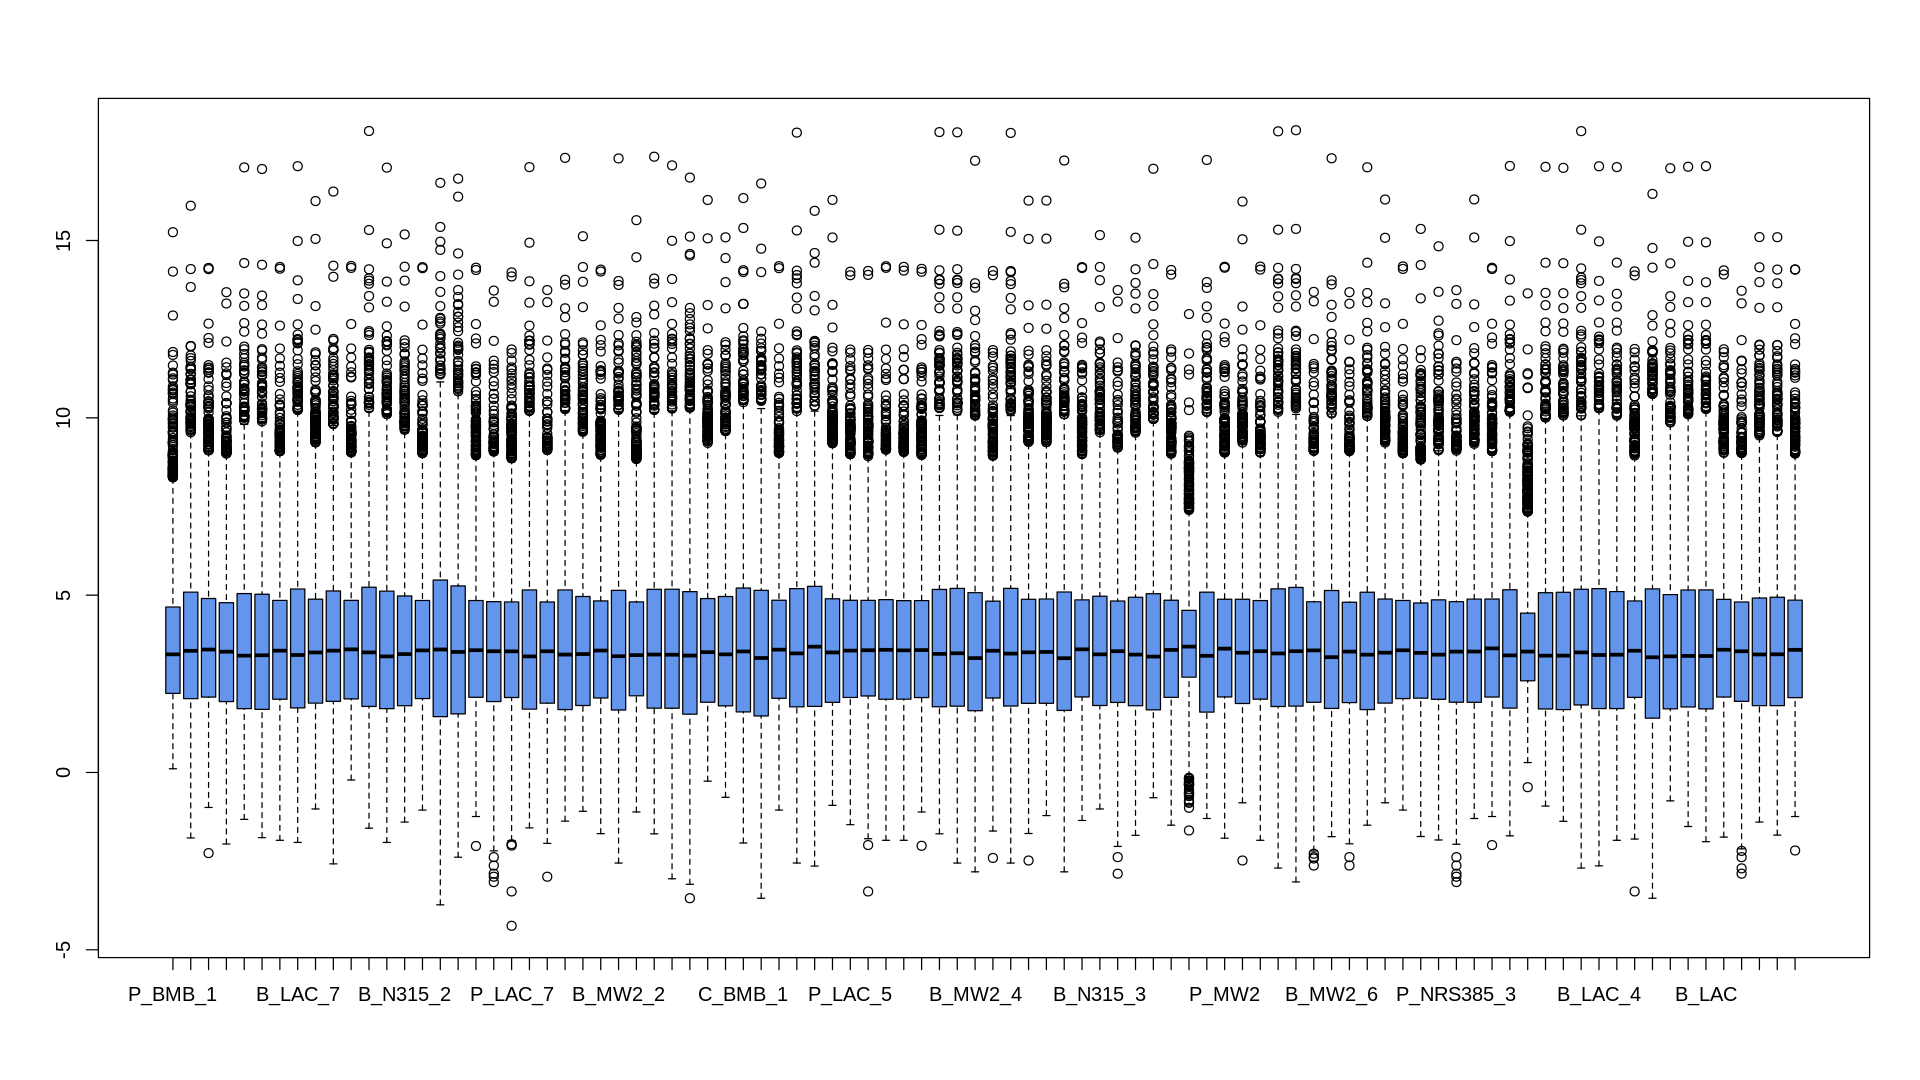

In [ ]:
#Setting the graphical parameters
options(repr.plot.width=16, repr.plot.height=9)
#Build a boxplot for all samples
boxplot(y2, col="cornflowerblue")

In [ ]:
#

In [ ]:
#We can see the dataset information and define the name of the genes.
SAbatch=as.data.frame(y2) #dataset after batch adjustment
dim(SAbatch); #Dimension
names(SAbatch); # columns names
SAdatExpr0 = as.data.frame(t(SAbatch)); #transposed
names(SAdatExpr0) = row.names(SAbatch); #gene names, in this case the indexes
rownames(SAdatExpr0) = names(SAbatch); # assignment of genes


[1] 3520   92

[1] "P_BMB_1"     "B_BMB_3"     "P_MW2_7"     "P_NRS385_4"  "B_MRSA252_6"
 [6] "B_MRSA252_2" "P_MRSA252_4" "B_LAC_7"     "P_N315_5"    "B_BMB_4"    
[11] "P_MRSA252_2" "B_NRS385"    "B_LAC_8"     "B_N315_2"    "P_MRSA252_3"
[16] "T_BMB_1"     "C_BMB_3"     "P_MW2_2"     "P_NRS385_7"  "P_LAC_7"    
[21] "B_LAC_3"     "P_NRS385"    "B_MW2_7"     "B_N315_5"    "P_MW2_3"    
[26] "B_MW2_2"     "D_BMB_3"     "B_MW2_5"     "B_LAC_5"     "C_BMB_2"    
[31] "P_N315_8"    "B_N315_4"    "C_BMB_1"     "B_BMB_1"     "P_MRSA252_8"
[36] "B_NRS385_2"  "P_BMB_2"     "P_N315_7"    "P_LAC_5"     "P_LAC_4"    
[41] "P_MRSA252_5" "P_MRSA252_6" "P_MW2_4"     "B_NRS385_6"  "B_NRS385_7" 
[46] "B_MW2_4"     "P_LAC_6"     "B_NRS385_3"  "P_N315_4"    "P_N315"     
[51] "B_MW2"       "P_MW2_8"     "B_N315_3"    "P_NRS385_5"  "B_N315_7"   
[56] "B_MRSA252_5" "P_LAC_2"     "P_BMB_4"     "B_MW2_3"     "P_MW2"      
[61] "P_N315_3"    "P_MRSA252"   "B_NRS385_8"  "B_NRS385_5"  "P_NRS385_8" 
[66] "B_MW2_6"     "P_NRS385_6"  "B_MRSA252_7" "P_N315_6"    "P_MRSA252_7"
[71] "P_BMB_3"     "D_BMB_1"     "P_NRS385_3"  "P_N315_2"    "P_MW2_6"    
[76] "B_LAC_6"     "D_BMB_2"     "B_MRSA252_8" "B_MRSA252_3" "B_NRS385_4" 
[81] "B_LAC_4"     "B_MRSA252_4" "P_LAC"       "B_BMB_2"     "B_MRSA252"  
[86] "B_LAC_2"     "B_LAC"       "P_LAC_3"     "P_NRS385_2"  "B_N315_6"   
[91] "B_N315"      "P_MW2_5"

In [ ]:
### Checking data for excessive missing values and identification outliers samples


gsg = goodSamplesGenes(SAdatExpr0, verbose = 5);
gsg$allOK

if (!gsg$allOK)
{
  # Optionally, print the gene and sample names that were removed:
  if (sum(!gsg$goodGenes)>0)
    printFlush(paste("Removing genes:", paste(names(SAdatExpr0)[!gsg$goodGenes], collapse = ", ")));
  if (sum(!gsg$goodSamples)>0)
    printFlush(paste("Removing samples:", paste(rownames(SAdatExpr0)[!gsg$goodSamples], collapse = ", ")));
  # Remove the offending genes and samples from the data:
  SAdatExpr0 = SAdatExpr0[gsg$goodSamples, gsg$goodGenes]
}

sampleTree = hclust(dist(SAdatExpr0), method = "average");

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

In [ ]:

# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
sizeGrWindow(60,30)
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
     cex.axis = 1.5, cex.main = 2)
# Plot a line to show the cut# Save the plot as a PNG file with the desired dimensions
png("sample_tree_and_dendrogram.png", width = 60, height = 30, units = "in", res = 300)

# Open a graphic output window of size 60 by 30 inches
par(cex = 0.6)
par(mar = c(0, 4, 2, 0))

# Determine cluster under the line
clust = cutreeStatic(sampleTree, cutHeight = 140)
table(clust)


clust
 1 
92 

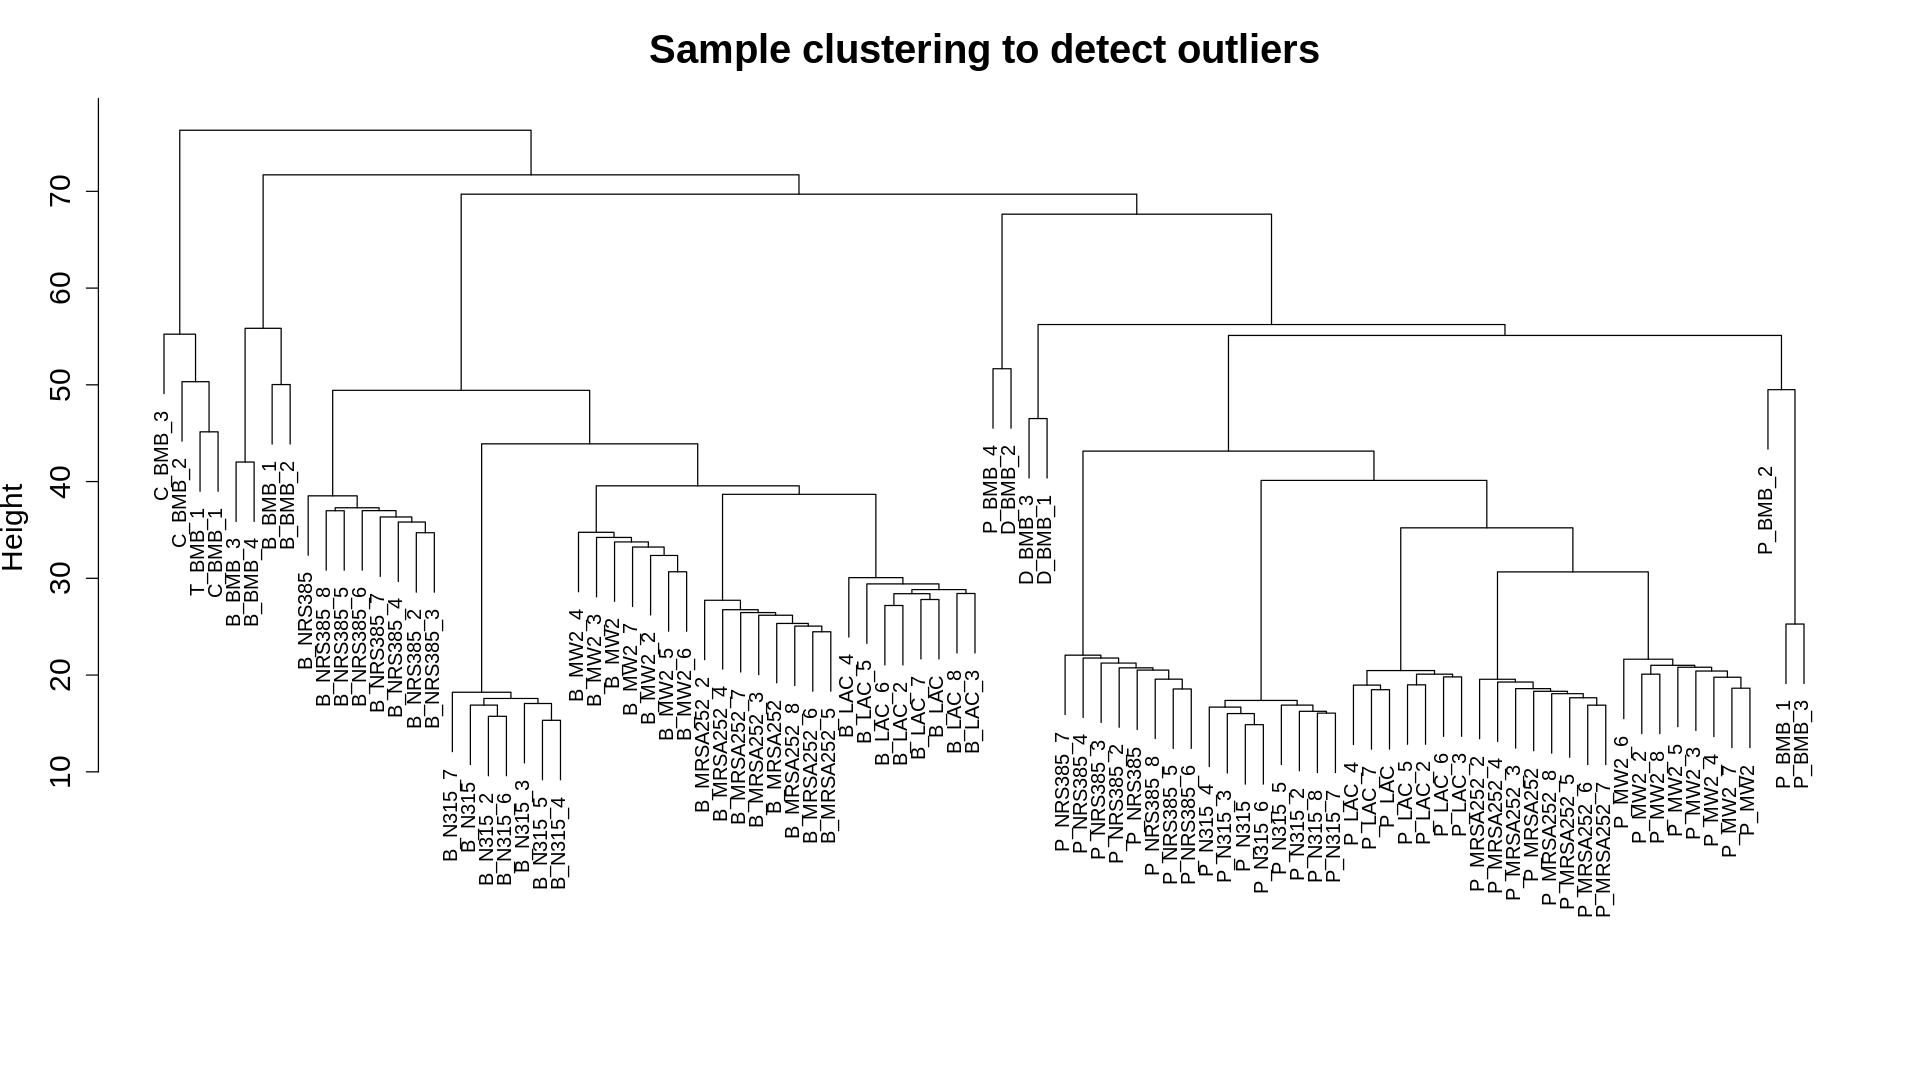

In [ ]:
# Plot the sample tree
plot(sampleTree, main = "Sample clustering to detect outliers", sub = "", xlab = "",
     cex.lab = 1.5, cex.axis = 1.5, cex.main = 2)
     # Add a red line to show the cut
abline(h = 140, col = "red")

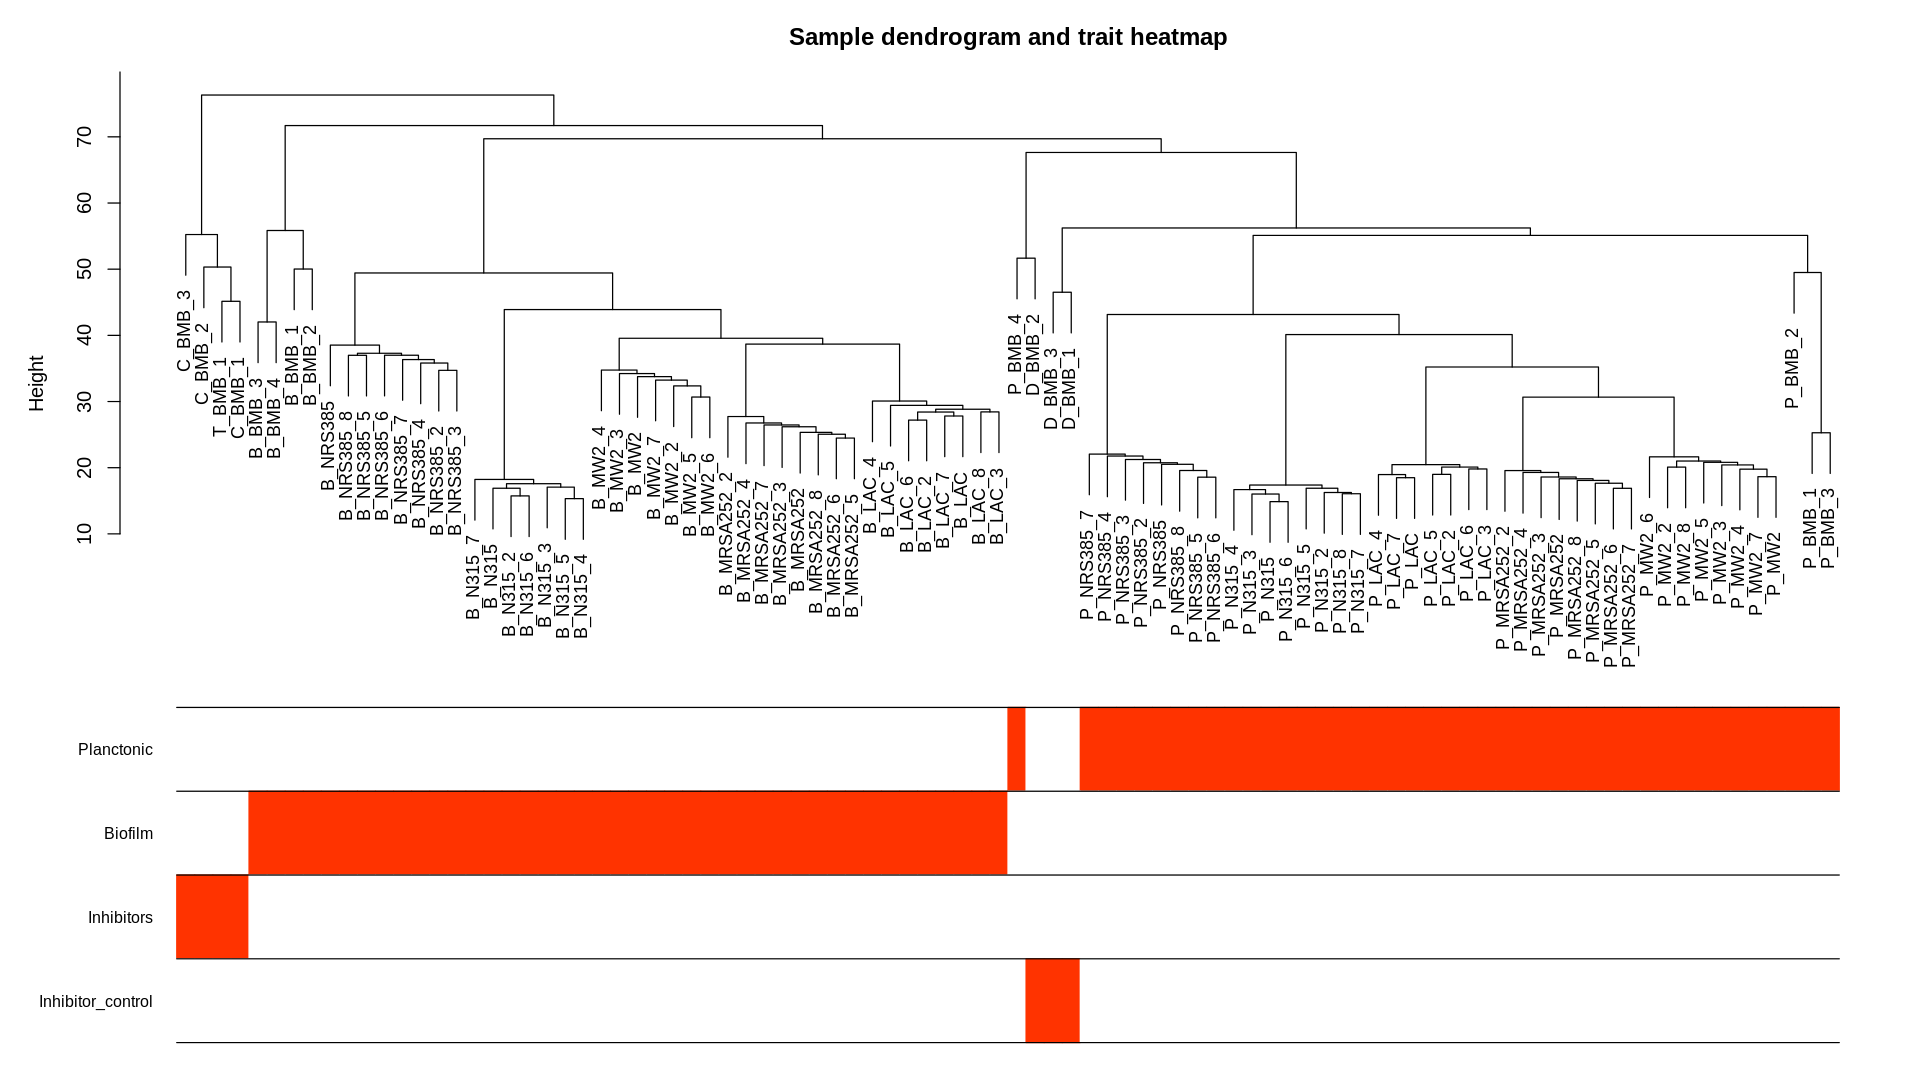

In [ ]:
# Keep samples from cluster 1
keepSamples = (clust == 1)
datExpr = SAdatExpr0[keepSamples, ]
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

# Read and process trait data
traitData = read.csv("table_treatment.csv")
Samples = rownames(datExpr)
traitRows = match(Samples, traitData$Treatment)
datTraits = traitData[traitRows, -1]
rownames(datTraits) = traitData[traitRows, 1]
# Collect garbage to free memory
collectGarbage()

# Create another dendrogram
sampleTree2 = hclust(dist(datExpr), method = "average")
traitColors = numbers2colors(datTraits, signed = FALSE)

# Plot sample dendrogram and trait heatmap
plotDendroAndColors(sampleTree2, traitColors, groupLabels = names(datTraits),
                    main = "Sample dendrogram and trait heatmap")

In [ ]:
# Choose scale-free topology
powers = c(c(1:10), seq(from = 12, to = 20, by = 2))
sft = pickSoftThreshold(datExpr, networkType = "unsigned", powerVector = powers)



   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.724  1.520          0.946 1080.00  1070.000 1730.0
2      2    0.028 -0.104          0.741  503.00   445.000 1120.0
3      3    0.700 -0.675          0.863  281.00   216.000  808.0
4      4    0.862 -0.900          0.924  176.00   116.000  619.0
5      5    0.894 -1.020          0.939  118.00    66.600  492.0
6      6    0.909 -1.090          0.950   83.20    41.100  401.0
7      7    0.922 -1.130          0.961   61.10    26.300  334.0
8      8    0.927 -1.160          0.970   46.30    17.500  284.0
9      9    0.930 -1.190          0.977   36.00    11.800  244.0
10    10    0.923 -1.210          0.978   28.50     8.230  212.0
11    12    0.923 -1.250          0.990   18.80     4.270  164.0
12    14    0.926 -1.280          0.992   13.00     2.360  131.0
13    16    0.923 -1.310          0.990    9.37     1.350  106.0
14    18    0.916 -1.330          0.985    6.97     0.797   87.8
15    20    0.904 -1.360 

In [ ]:
"
# Close the graphical device to save the file
dev.off()
abline(h = 140, col = red);


# Determine cluster under the line
clust = cutreeStatic(sampleTree, cutHeight = 140)
table(clust)
# clust 1 contains the samples we want to keep.
keepSamples = (clust==1)
datExpr = SAdatExpr0[keepSamples, ]
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)
"

[1] "\n# Close the graphical device to save the file\ndev.off()\nabline(h = 140, col = red);\n\n\n# Determine cluster under the line\nclust = cutreeStatic(sampleTree, cutHeight = 140)\ntable(clust)\n# clust 1 contains the samples we want to keep.\nkeepSamples = (clust==1)\ndatExpr = SAdatExpr0[keepSamples, ]\nnGenes = ncol(datExpr)\nnSamples = nrow(datExpr)\n"

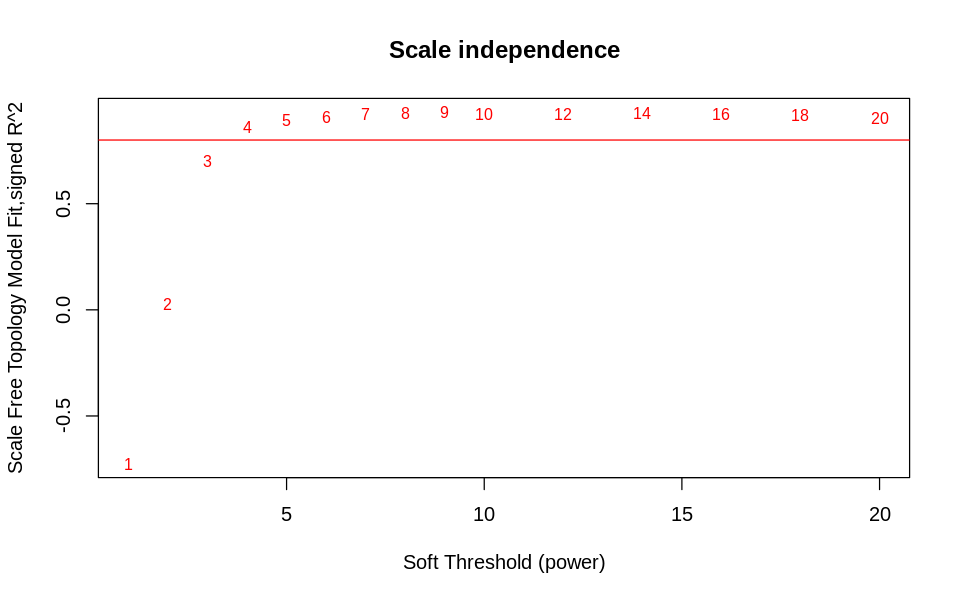

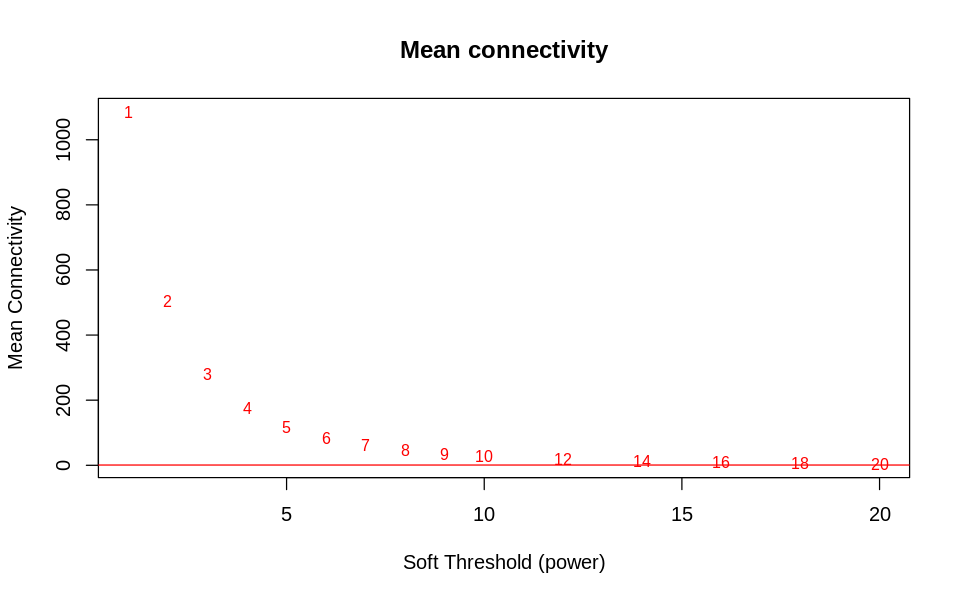

In [ ]:
#Setting the graphical parameters
options(repr.plot.width=8, repr.plot.height=5)
cex1 = 0.8;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.8,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
#This line corresponds to use a cut-off R² of h
abline(h=0.80,col="red")


In [ ]:
softPower =4;
#We calculate the adjacency matrix with a Pearson correlation.
adjacency = adjacency(datExpr, type="unsigned", power = softPower,corFnc= "bicor");

#We calculate the matrix TOM
TOM=TOMsimilarityFromExpr(adjacency, networkType = "unsigned",power = softPower)

dissTOM = 1-TOM

Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


TOM calculation: adjacency..
..will use 2 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


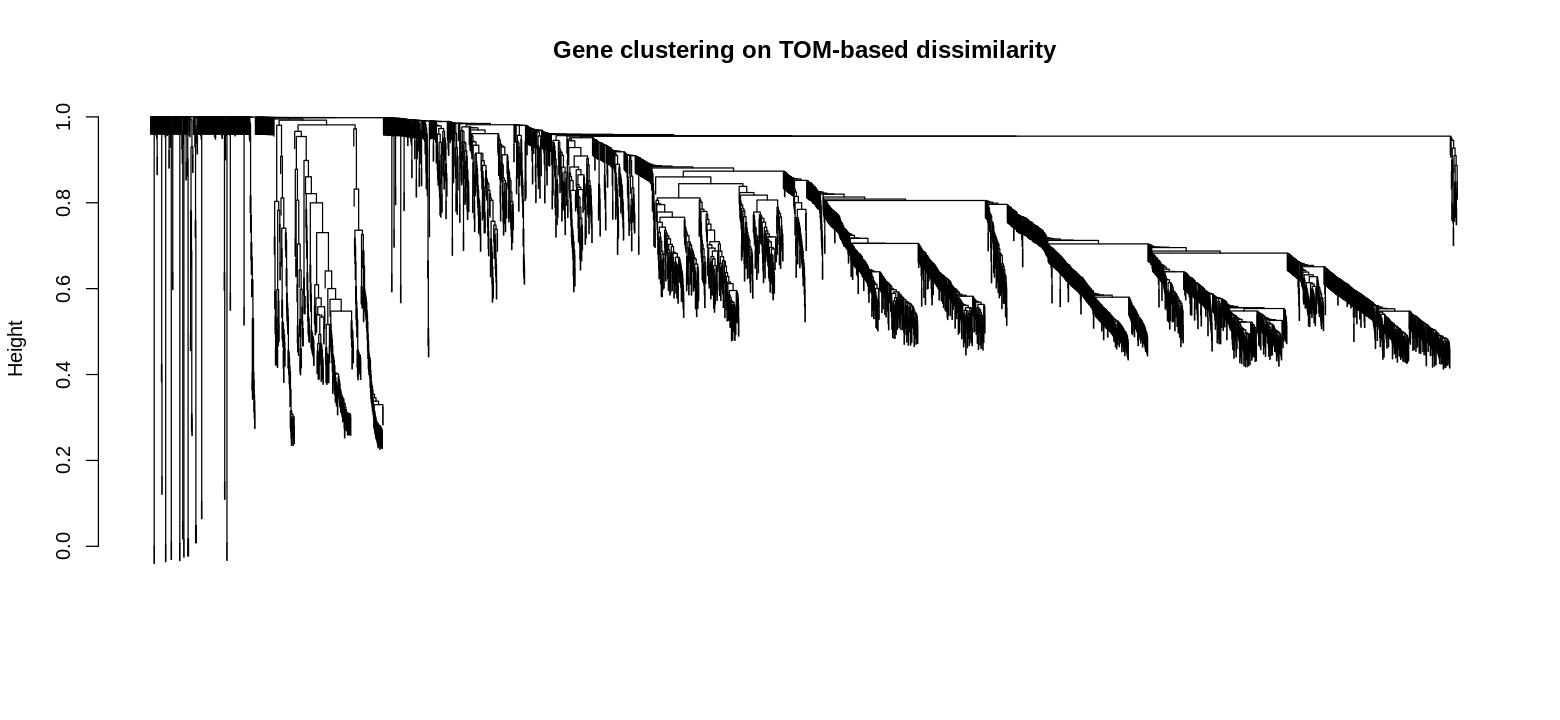

In [ ]:
#creating the dendogram
geneTree = flashClust(as.dist(dissTOM),method="average");

#Setting the graphical parameters
options(repr.plot.width=13, repr.plot.height=6)

# Plot the resulting clustering tree (dendrogram)

plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
     labels = FALSE, hang = 0.04);


In [ ]:
# Set the minimum module size,
#This is a number proposed by the user, 20 is a common value
minModuleSize = 30;

In [ ]:
# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,deepSplit = 2, pamRespectsDendro = FALSE,minClusterSize = minModuleSize);

#the following command gives the module labels and the size of each module. Lable 0 is reserved for unassigned genes
table(dynamicMods)

 ..cutHeight not given, setting it to 0.995  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
338 659 509 368 319 285 160 124  89  85  85  84  80  74  62  59  50  49  41 

In [ ]:


#Plot the module assignment under the dendrogram; note: The grey color is reserved for unassigned genes

dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)



dynamicColors
       black         blue        brown         cyan        green  greenyellow 
         124          509          368           62          285           84 
        grey       grey60    lightcyan   lightgreen      magenta midnightblue 
         338           49           50           41           85           59 
        pink       purple          red       salmon          tan    turquoise 
          89           85          160           74           80          659 
      yellow 
         319 

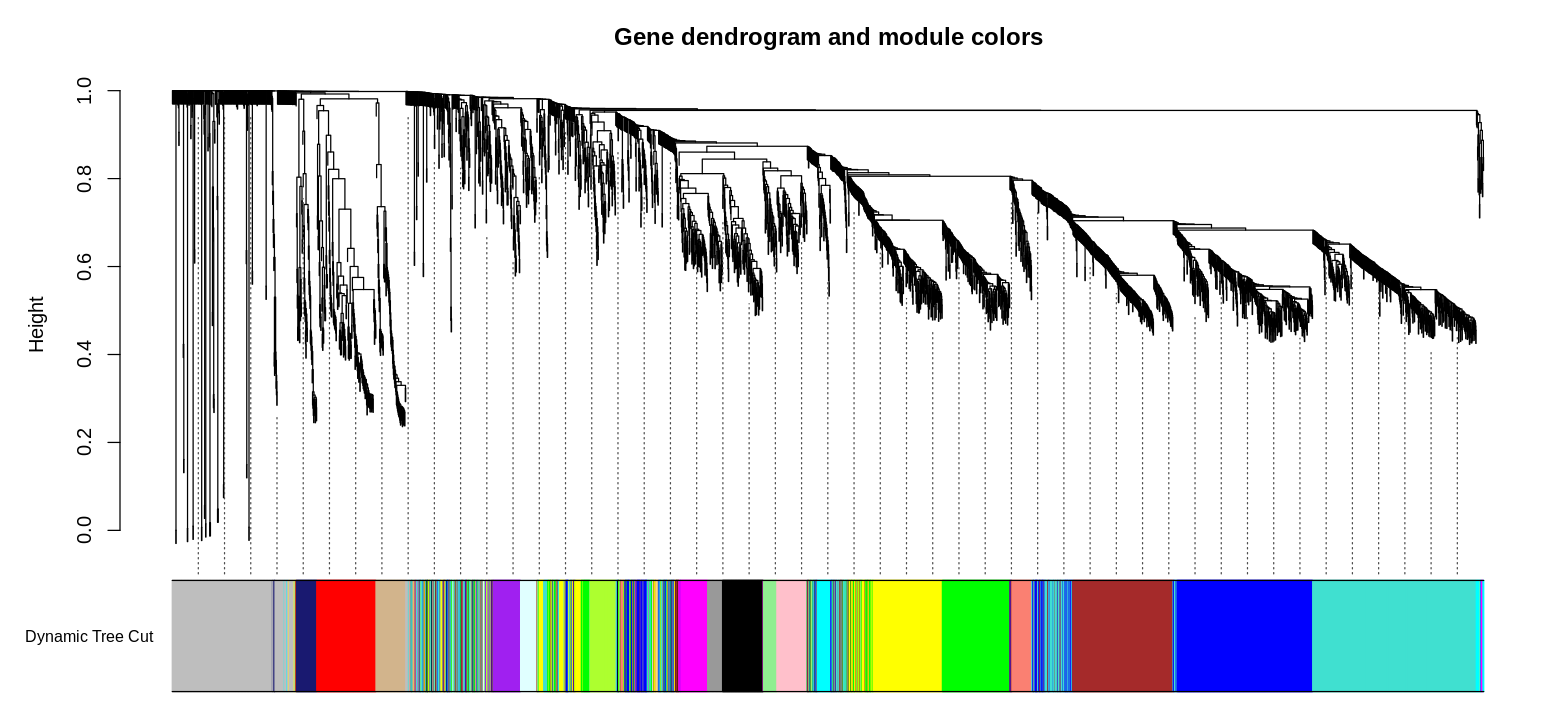

In [ ]:
# Plot the dendrogram and colors underneath
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")

In [ ]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");




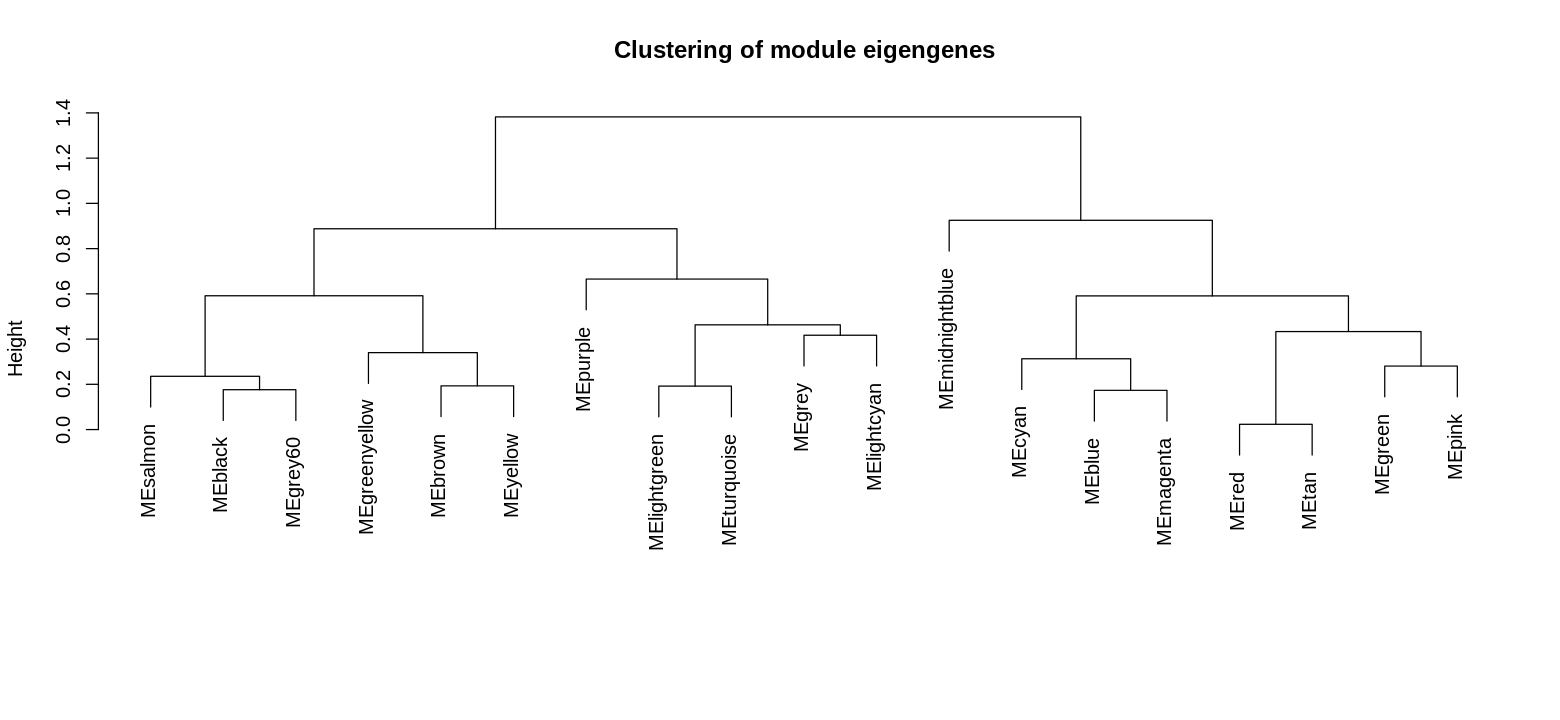

In [ ]:
# Plot the result
plot(METree, main = "Clustering of module eigengenes",
     xlab = "", sub = "")


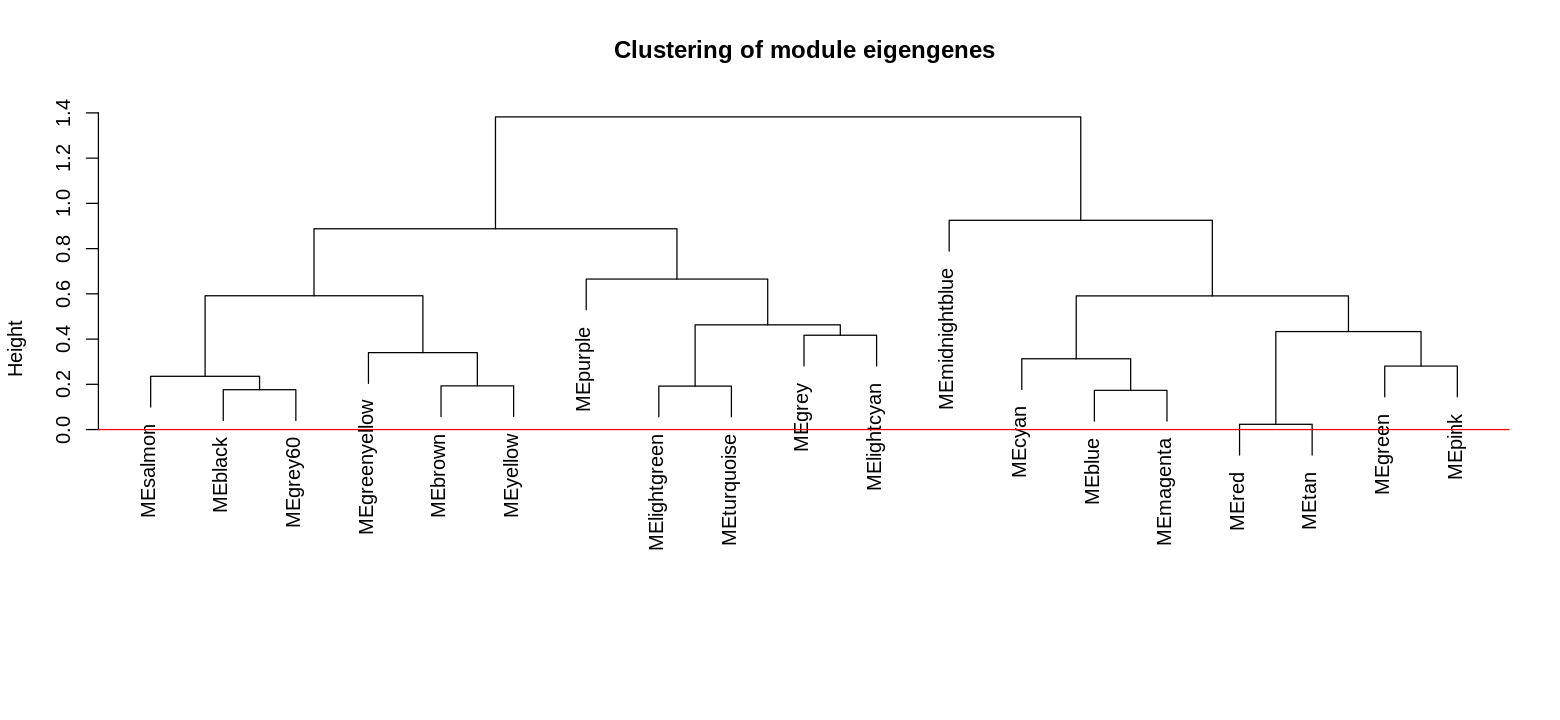

In [ ]:
MEDissThres = 0.0
# Plot the cut line into the dendrogram
plot(METree, main = "Clustering of module eigengenes",
     xlab = "", sub = "")
abline(h=MEDissThres, col = "red")


In [ ]:
# Call an automatic merging function
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 5)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;


 mergeCloseModules: Merging modules whose distance is less than 0
   .. will look for grey label MEgrey
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes : Working on ME for module black
      ... 124 genes
     moduleEigengenes : Working on ME for module blue
      ... 509 genes
     moduleEigengenes : Working on ME for module brown
      ... 368 genes
     moduleEigengenes : Working on ME for module cyan
      ... 62 genes
     moduleEigengenes : Working on ME for module green
      ... 285 genes
     moduleEigengenes : Working on ME for module greenyellow
      ... 84 genes
     moduleEigengenes : Working on ME for module grey60
      ... 49 genes
     moduleEigengenes : Working on ME for module lightcyan
      ... 50 genes
     moduleEigengenes : Working on ME for module lightgreen
      ... 41 genes
     moduleEigengenes : Working on ME for module magenta
      ... 85 genes
     moduleEigengenes : Working on ME for module midnightblue
      ..

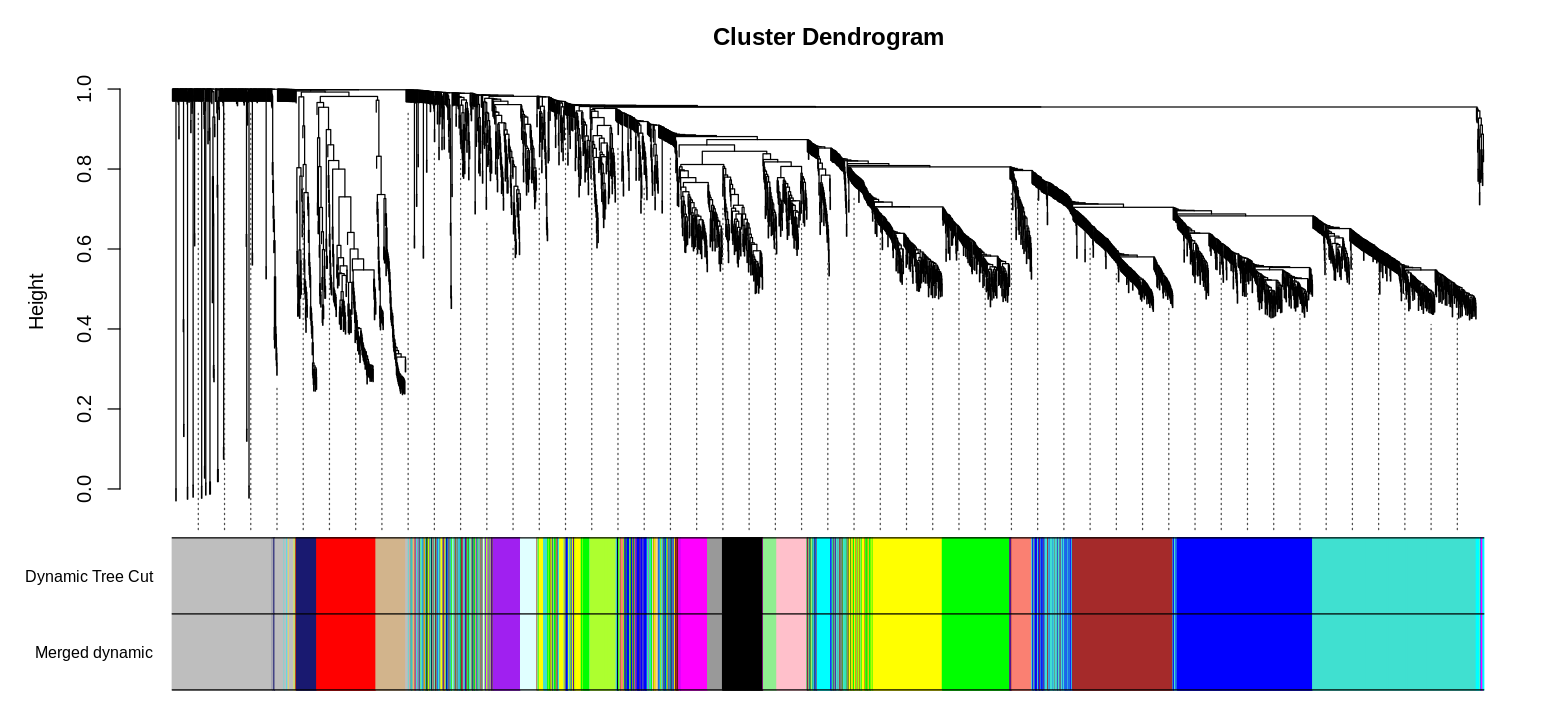

In [ ]:
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)

In [ ]:
# Rename to moduleColors
moduleColors = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels = match(moduleColors, colorOrder)-1;
MEs = mergedMEs;
# Save module colors and labels for use in subsequent parts
#save(MEs, moduleLabels, moduleColors, geneTree, file = "modulesSAPearsonhybrid..RData")

In [ ]:
#export modules
modules=unique(moduleColors) #we obtain the unique modules.
#We eliminate all the genes that are in the grey module, and therefore are not correlated.
modules <- modules[ modules != 'grey' ]
probes = names(datExpr) #gene names
inModule = is.finite(match(moduleColors, modules))
modProbes = probes[inModule]
modTOM = TOM[inModule, inModule]
dimnames(modTOM) = list(modProbes, modProbes)

#We save the files, which serve as input to a network visualization program called Cytoscape.
#The first file contains the interactions between each pair of genes and the second the color of the module to which each gene belongs.
#The threshold is 0.0 because we export all possible interactions, if this threshold increases we can filter out the strongest interactions.
cyt = exportNetworkToCytoscape( modTOM, edgeFile = paste("Unsigned-CytoscapeInput-edges-SAPearson.txt", sep=""), nodeFile = paste("UnsignedCytoscapeInput-nodes-SAPearson.txt"), weighted = TRUE, threshold = 0.1, nodeNames = modProbes, nodeAttr = moduleColors[inModule]);


#We can filter the genes and their associated module color, to work on another analysis.
dfrm <- data.frame(NameGen = modProbes, Mcolors = moduleColors[inModule])
write.table(dfrm, file="ModulesSAPearsonUnsigned.csv", sep="\t", row.names=FALSE, col.names=TRUE,quote=FALSE)

In [ ]:
#export modules
modules=unique(moduleColors) #we obtain the unique modules.
#We eliminate all the genes that are in the grey module, and therefore are not correlated.
modules <- modules[ modules != 'grey' ]
probes = names(datExpr) #gene names
inModule = is.finite(match(moduleColors, modules))
modProbes = probes[inModule]
modTOM = TOM[inModule, inModule]
dimnames(modTOM) = list(modProbes, modProbes)

In [ ]:

nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, moduleColors)$eigengenes
MEs = orderMEs(MEs0)
moduleTraitCor = cor(MEs, datTraits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

#save(TOM,moduleColorsAutomatic,MEs0,moduleTraitCor, moduleColors, datExpr, file = "S_aureus.RData")

pdf(file="ModuletraitrelationshipsS_aureus.pdf", width=9, height=9);

# Will display correlations and their p-values
textMatrix = paste(signif(moduleTraitCor, 2), "\n(", signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)

labeledHeatmap.multiPage(
  # Input data and ornaments
  Matrix = moduleTraitCor,
  xLabels = names(datTraits), yLabels = names(MEs), ySymbols = names(MEs), colorLabels = FALSE, colors = blueWhiteRed(50), textMatrix = textMatrix,

  # Paging options
  rowsPerPage = NULL, maxRowsPerPage = 15,
  colsPerPage = NULL, maxColsPerPage = 10,
  addPageNumberToMain = TRUE,

  # Further arguments to labeledHeatmap
  cex.text = 0.5, main = paste("Module-trait relationships"))
dev.off()


pdf 
  2

In [ ]:
datExpr

,RNAseP,SABB_RS00005//SA_RS00145//SAR_RS00005//SAUSA300_RS00010//MW_RS00005,SABB_RS00010//SA_RS00150//SAR_RS00010//SAUSA300_RS00015//MW_RS00010,SABB_RS00015//SA_RS00155//SAR_RS00015//SAUSA300_RS00020//MW_RS00015,SABB_RS00020//SA_RS00160//SAR_RS00020//SAUSA300_RS00025//MW_RS00020,SABB_RS00025//SA_RS00165//SAR_RS00025//SAUSA300_RS00030//MW_RS00025,SABB_RS00030//SA_RS00170//SAR_RS00030//SAUSA300_RS00035//MW_RS00030,SABB_RS00035//SAR_RS00035//SAUSA300_RS00040//MW_RS00035,SABB_RS00040//SA_RS00180//SAR_RS00040//SAUSA300_RS00045//MW_RS00040,SABB_RS00045//SA_RS00185//SAR_RS00045//SAUSA300_RS00050//MW_RS00045,⋯,srn_9510_sRNA390,srn_9520_sRNA393,srn_9525_tsr26,srn_9526_tsr27,srn_9540_sRNA407,srn_9550_sRNA409,srn_9580_tsr1,srn_9590_tsr2,srn_9630_tsr30,tmRNA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P_BMB_1,10.781410,6.161936,5.873557,6.010547,5.975835,6.354522,5.244631,4.369947,4.311277,6.312493,⋯,3.3154137,0.2911398,1.7621440,1.7200857,4.888957,2.1170055,1.7100933,0.9688817,0.8245616,5.235965
B_BMB_3,11.684749,5.455532,6.239702,7.411159,7.167126,7.971666,7.541602,4.269305,4.166481,6.996620,⋯,-1.3532288,0.2911398,-1.3133365,1.8364372,2.570484,2.8365402,1.7100933,0.9688817,0.8245616,5.339235
P_MW2_7,11.284332,6.347956,5.831168,5.539079,5.764735,6.418920,5.921904,4.344327,3.347274,6.382702,⋯,0.9547834,0.2911398,0.6683133,2.1278896,4.972394,1.7700181,1.2092619,2.3025432,0.8245616,3.405504
P_NRS385_4,9.113239,6.027461,5.862999,5.975610,6.078331,6.449112,5.801557,4.182640,3.077403,6.265330,⋯,1.2219990,1.1866321,0.3694712,0.9029468,4.920485,2.1683676,1.7100933,0.9688817,-1.5708480,5.155746
B_MRSA252_6,12.672008,6.113935,6.105737,7.229669,7.098532,6.890633,5.300349,4.196970,3.987537,5.454331,⋯,0.9547834,0.2911398,0.6683133,2.1278896,4.186146,2.1683676,1.7100933,0.9688817,0.8245616,5.155746
B_MRSA252_2,12.631470,6.085275,6.067044,7.096704,6.955718,6.809492,5.309251,4.049733,4.090457,5.370516,⋯,0.9547834,0.2911398,0.6683133,2.1278896,3.907625,2.1683676,1.7100933,0.9688817,0.8245616,5.155746
P_MRSA252_4,9.898480,6.023199,5.909320,5.758998,5.717663,6.517612,6.122755,3.943120,3.430128,6.319911,⋯,0.9547834,0.2911398,0.6683133,2.1278896,5.776169,2.1683676,1.7100933,0.9688817,0.8245616,5.155746
B_LAC_7,12.635793,5.953000,6.400359,7.649590,7.232796,7.211770,6.068778,4.122335,4.445802,6.261308,⋯,1.4190205,1.6002999,2.0617568,2.4244323,4.920485,2.1683676,2.2591226,1.0578466,-1.7273985,5.155746
P_N315_5,11.489793,6.054091,5.911227,5.005502,5.511347,6.701843,5.893485,4.072455,3.712252,5.728772,⋯,0.9547834,0.2911398,0.6683133,2.1278896,4.920485,2.1683676,1.7100933,0.9688817,0.8245616,5.155746


In [ ]:
# Identify top hub genes in each module
topHubs <- chooseTopHubInEachModule(datExpr, colorh = moduleColors, omitColors = "grey")

# View the top hub genes for each module
print(topHubs)


                                                                black 
"SABB_RS12670//SA_RS11715//SAR_RS12155//SAUSA300_RS12100//MW_RS11730" 
                                                                 blue 
            "SABB_RS02030//SAR_RS01975//SAUSA300_RS01990//MW_RS01840" 
                                                                brown 
            "SABB_RS13275//SAR_RS12750//SAUSA300_RS12700//MW_RS12320" 
                                                                 cyan 
            "SABB_RS03340//SAR_RS03130//SAUSA300_RS03170//MW_RS03090" 
                                                                green 
"SABB_RS00105//SA_RS00245//SAR_RS00105//SAUSA300_RS00110//MW_RS00105" 
                                                          greenyellow 
                                                   "srn_1230_sRNA108" 
                                                               grey60 
"SABB_RS09325//SA_RS08400//SAR_RS08930//SAUSA300_RS08805//MW_RS08595" 
      

In [ ]:
write.csv(topHubs, file = "topHubs.csv", row.names = FALSE)